**Hyperparameter Tuning**
---

It's a method used to find the optimal parameters for a machine learning algorithm.
It's important to search what parameters the algorithm offers and I can tune.

Best results:


*   Decision Tree: 0.95%
*   Random Forest: 0.96%
*   KNN: 0.93%
*   Logistic Regression: 0.95%
*   SVM: 0.95%
*   MLP: 0.98% with scaled data


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [ ]:
data, target = load_breast_cancer(return_X_y=True)

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

Decision Tree
---


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'criterion': 'entropy',
  'min_samples_leaf': 5,
  'min_samples_split': 10,
  'splitter': 'best'},
 0.943766495885732)

Random Forest
---

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'criterion': 'entropy',
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 10},
 0.9648812296227295)

KNN
---

In [ ]:
parameters = {'n_neighbors': [7, 9, 11],
              'p': [1, 2]}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'n_neighbors': 9, 'p': 2}, 0.968390001552554)

Logistic Regression
---

In [ ]:
parameters = {'solver': ['liblinear', 'lbfgs', 'sag'],
              'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [ ]:
best_parameters, best_result

({'C': 1.0, 'solver': 'lbfgs', 'tol': 0.001}, 0.9806862288464524)

Support Vector Machine
---

In [ ]:
parameters = {'C': [1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly'],
              'tol': [0.001, 0.0001]}
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [ ]:
best_parameters, best_result

({'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}, 0.9771619313771154)

MLP
---

In [ ]:
parameters = {'activation': ['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(data, target)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
best_parameters, best_result

({'activation': 'logistic', 'batch_size': 10, 'solver': 'sgd'},
 0.9824406148113647)

Cross Validation
---


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
tree_results = []
randomf_results = []
mlp_results = []
svm_results = []

In [ ]:
for i in range(10):  # 300 tests with 10 splits and 30 random states is better
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, 
                                min_samples_split=5, splitter='random')
  score = cross_val_score(tree, data, target, cv=kfold)
  tree_results.append(score.mean())

In [ ]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  randomf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, 
                                   min_samples_split=2, n_estimators=10)
  score = cross_val_score(randomf, data, target, cv=kfold)
  randomf_results.append(score.mean())

In [ ]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  svm_cls = SVC(C=1.5, kernel='rbf', tol=0.001)
  score = cross_val_score(svm_cls, data, target, cv=kfold)
  svm_results.append(score.mean())

In [ ]:
for i in range(10):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mlp_cls = MLPClassifier(activation='logistic', batch_size=10, solver='adam')
  score = cross_val_score(mlp_cls, data, target, cv=kfold)
  mlp_results.append(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
svm_results # each result is the mean of 10 tests with different combinations of slices

[0.9789473684210526,
 0.9736215538847116,
 0.9753759398496239,
 0.9753759398496239,
 0.9771303258145363,
 0.9735902255639097,
 0.9806704260651629,
 0.9718671679197994,
 0.9718984962406015,
 0.975407268170426]

Results Analysis
---

In [ ]:
results = pd.DataFrame({'Decision tree': tree_results,
                        'SVM': svm_results,
                        'Random forest': randomf_results,
                        'Neural Network': mlp_results})
results # this structure could be used to analyse the precision and recall too

,Decision tree,SVM,Random forest,Neural Network
0,0.949029,0.978947,0.956109,0.973684
1,0.933239,0.973622,0.948997,0.968358
2,0.943797,0.975376,0.957832,0.973653
3,0.931454,0.975376,0.966635,0.970144
4,0.924405,0.977130,0.954323,0.971836
5,0.936623,0.973590,0.959524,0.971836
6,0.924499,0.980670,0.957895,0.971898
7,0.922682,0.971867,0.964881,0.970113
8,0.922588,0.971898,0.954261,0.964818
9,0.929668,0.975407,0.954292,0.971867


In [ ]:
results.describe() # best std = MLP and SVM
# the best algorithm here is SVM due to its score and std

,Decision tree,SVM,Random forest,Neural Network
count,10.000000,10.000000,10.000000,10.000000
mean,0.931798,0.975388,0.957475,0.970821
std,0.009109,0.002878,0.005243,0.002658
min,0.922588,0.971867,0.948997,0.964818
25%,0.924428,0.973598,0.954300,0.970121
50%,0.930561,0.975376,0.956971,0.971836
75%,0.935777,0.976700,0.959117,0.971891
max,0.949029,0.980670,0.966635,0.973684


In [ ]:
results.std() / results.mean() * 100 # coefficient of variation

Decision tree     0.977572
SVM               0.295040
Random forest     0.547576
Neural Network    0.273799
dtype: float64

Statistical hypothesis testing
---
Is SVM better than Support Vector Machine and Random Forest?

In [ ]:
alpha = 0.05  # confiability = 95%

p-value is the second value returned by shapiro

In [ ]:
from scipy.stats import shapiro  # verify normal distributions
shapiro(mlp_results), shapiro(svm_results), shapiro(randomf_results)

((0.8664112687110901, 0.090765580534935),
 (0.9348790645599365, 0.49755704402923584),
 (0.9390589594841003, 0.5425910949707031))

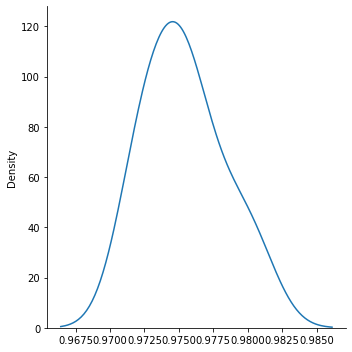

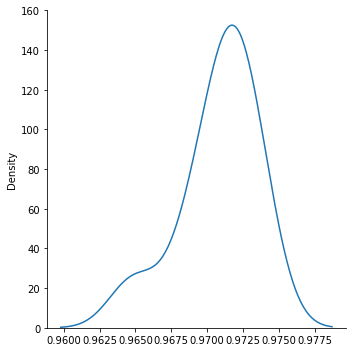

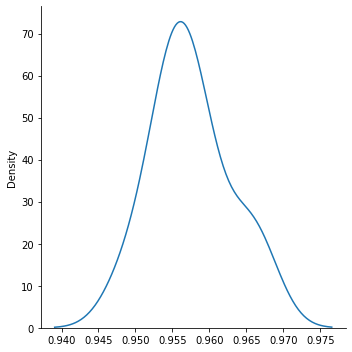

In [ ]:
import seaborn as sns
sns.displot(svm_results, kind='kde') # svm has the only normal distribution
sns.displot(mlp_results, kind='kde') 
sns.displot(randomf_results, kind='kde') 

In [ ]:
from scipy.stats import f_oneway # there is only one algorithm with normal distribution
_, p = f_oneway(mlp_results, svm_results, randomf_results)
p 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


nan

In [ ]:
alpha = 0.05 
if p <= alpha:
  print('Null hypothesis was rejected. There are statistical differences.')
else:
  print('Alternative hypothesis rejected. There are not statistical differences.')

Null hypothesis was rejected. There are statistical differences.


In [ ]:
import numpy as np
algo_results = {'accuracy': np.concatenate([mlp_results, svm_results, randomf_results]),
                'algorithm': ['mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp', 'mlp',
                 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 
                 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', 'rf', ]}

In [ ]:
import pandas as pd
df_results = pd.DataFrame(algo_results)
df_results

,accuracy,algorithm
0,0.973684,mlp
1,0.968358,mlp
2,0.973653,mlp
3,0.970144,mlp
4,0.971836,mlp
5,0.971836,mlp
6,0.971898,mlp
7,0.970113,mlp
8,0.964818,mlp
9,0.971867,mlp


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
algo_comparison = MultiComparison(df_results['accuracy'], df_results['algorithm'])
statistical_tests = algo_comparison.tukeyhsd()
print(statistical_tests) # another test should be applied because of the non normal distribution

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   mlp     rf  -0.0133  0.001 -0.0175 -0.0092   True
   mlp    svm   0.0046 0.0305  0.0004  0.0088   True
    rf    svm   0.0179  0.001  0.0137  0.0221   True
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
results.mean() # svm is better than the others, because there are statistical differences.

Decision tree     0.931798
SVM               0.975388
Random forest     0.957475
Neural Network    0.970821
dtype: float64

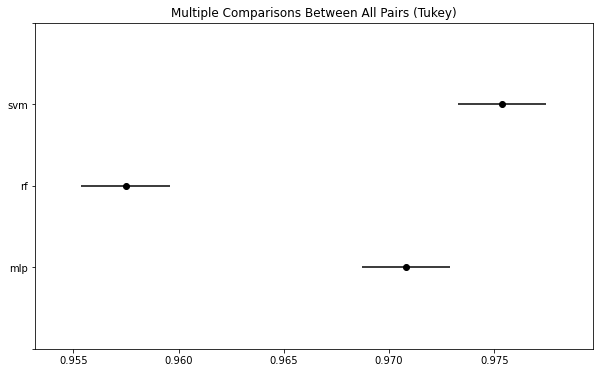

In [ ]:
statistical_tests.plot_simultaneous();

Exporting classifiers
---

In [ ]:
mlp_classifier = MLPClassifier(activation='relu', batch_size=56, solver='sgd')
mlp_classifier.fit(data, target)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=56, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
svm_classifier = SVC(C=1.5, kernel='rbf', tol=0.001, probability=True)
svm_classifier.fit(data, target)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
randomf_classifier = RandomForestClassifier(criterion='entropy', 
                                            min_samples_leaf=5,
                                            min_samples_split=10,
                                            n_estimators=10)
randomf_classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import pickle 
pickle.dump(mlp_classifier, open('mlp_final.sav', 'wb'))
pickle.dump(randomf_classifier, open('randomf_final.sav', 'wb'))
pickle.dump(svm_classifier, open('svm_final.sav', 'wb'))

Uploading classifiers
---

In [ ]:
neural_network = pickle.load(open('/content/mlp_final.sav', 'rb'))
random_forest = pickle.load(open('/content/randomf_final.sav', 'rb'))
support_vector_machine = pickle.load(open('/content/svm_final.sav', 'rb'))

In [ ]:
new_data = data[19]
new_data = new_data.reshape(1, -1)
new_data

array([[-0.16679919, -1.1471623 , -0.18572799, -0.2519565 ,  0.10174657,
        -0.43685025, -0.27820957, -0.02860929,  0.26791123, -0.72830966,
        -0.48822526, -0.77699899, -0.40001405, -0.36912442,  0.4736929 ,
        -0.60797417, -0.26604255,  0.21960965, -0.08987642, -0.56544939,
        -0.24004796, -1.04500496, -0.22521706, -0.29776075,  0.50987305,
        -0.48960521, -0.15922253,  0.21612292,  0.12334653, -0.62929189]])

In [ ]:
mlp_answer = neural_network.predict(new_data)
rf_answer = random_forest.predict(new_data)
svm_answer = support_vector_machine.predict(new_data)

In [ ]:
all_answers = [mlp_answer[0], rf_answer[0], svm_answer[0]]

Combining classifiers
---

In [ ]:
Counter(target), target

(Counter({0: 212, 1: 357}),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1,

In [ ]:
# 0-malign 1-benign
malign = 0 
benign = 0

if mlp_answer[0] == 1:
  benign += 1
else:
  malign += 1

if svm_answer[0] == 1:
  benign +=1
else:
  malign += 1

if rf_answer[0] == 1:
  benign += 1
else:
  malign += 1

if malign > benign:
  print('Malign cancer cell')
else:
  print('Benign cancer cell')

Benign cancer cell


Rejecting classifiers
---

In [ ]:
mlp_proba = neural_network.predict_proba(new_data)
rf_proba = random_forest.predict_proba(new_data)
svm_proba = support_vector_machine.predict_proba(new_data)
mlp_proba, rf_proba, svm_proba

(array([[0.03002341, 0.96997659]]),
 array([[0.04444444, 0.95555556]]),
 array([[0.00623751, 0.99376249]]))

In [ ]:
reliability_mlp = mlp_proba.max()
reliability_rf = rf_proba.max()
reliability_svm = svm_proba.max()

In [ ]:
all_rel = [reliability_mlp, reliability_rf, reliability_svm]
all_rel

[0.9699765908305469, 0.9555555555555555, 0.9937624934322591]

In [ ]:
lowest_reliability = 0.999
algorithms = 0

for i in all_rel:
  if i >= lowest_reliability:
    algorithms += 1

In [ ]:
# 0-malign 1-benign
malign = 0 
benign = 0

if mlp_answer[0] == 1:
  benign += 1
else:
  malign += 1

if svm_answer[0] == 1:
  benign +=1
else:
  malign += 1

if rf_answer[0] == 1:
  benign += 1
else:
  malign += 1
if algorithms > 1:
  if malign > benign:
    print('Malign cancer cell')
  else:
    print('Benign cancer cell')
else:
  print('The algorithms are not sure about the cell.')

The algorithms are not sure about the cell.
